In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')
dataset = 'drive/MyDrive/MortalityDATA.xlsx'
df = pd.read_excel(dataset)
df.shape

Mounted at /content/drive


(91713, 85)

In [26]:
DM_df = df[df['diabetes_mellitus'] == 1]  #Selecting Only Diabetes
DM_df = DM_df.drop(['diabetes_mellitus'], axis=1)

In [28]:
DM_df = DM_df.drop(columns=[
    'encounter_id', 'icu_id', 'patient_id','hospital_id', #id
    'weight','height', #to BMI | there is no possible way to fill bmi with height and weight
    'Unnamed: 83', #null
    'ethnicity', #Sri lanka?
    'aids', 'lymphoma', 'cirrhosis','leukemia','hepatic_failure','immunosuppression','solid_tumor_with_metastasis' #less contributing diseases
    ])

KeyError: "['encounter_id', 'icu_id', 'patient_id', 'hospital_id', 'weight', 'height', 'Unnamed: 83', 'ethnicity', 'aids', 'lymphoma', 'cirrhosis', 'leukemia', 'hepatic_failure', 'immunosuppression', 'solid_tumor_with_metastasis'] not found in axis"

In [29]:
DM_df = DM_df.drop(columns=[ #noninvasive
                            'd1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min',
                            'd1_mbp_noninvasive_max','d1_mbp_noninvasive_min',
                             'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
                             'h1_diasbp_noninvasive_max','h1_diasbp_noninvasive_min',
                             'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min',
                             'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min'
    ])

In [30]:
X = DM_df.copy()
y = X['hospital_death']  #target variable
X = X.drop(['hospital_death'], axis=1)
X.shape

(20492, 56)

In [31]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['icu_type','gender', 'icu_stay_type','icu_admit_source','apache_3j_bodysystem','apache_2_bodysystem']  # Replace with your categorical columns

label_encoder = LabelEncoder()
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)  # You can adjust n_estimators
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_*100

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Features with importance below 1
features_to_drop = feature_importance_df[feature_importance_df['Importance'] < 1]['Feature'].tolist()

# Drop the features
Xdroped = X.drop(columns=features_to_drop)
# Xdroped.columns
features_to_drop

['gcs_verbal_apache',
 'icu_type',
 'apache_3j_bodysystem',
 'ventilated_apache',
 'icu_admit_source',
 'd1_spo2_max',
 'apache_2_bodysystem',
 'intubated_apache',
 'gender',
 'arf_apache',
 'icu_stay_type',
 'elective_surgery',
 'apache_post_operative',
 'gcs_unable_apache']

In [33]:
Xdroped_2 = Xdroped.drop(columns=['apache_4a_icu_death_prob', 'apache_4a_hospital_death_prob'])
Xdroped_2.shape

(20492, 40)

In [34]:
# apache score drop
Xdroped_3 = Xdroped_2.drop(columns=['gcs_motor_apache','resprate_apache','heart_rate_apache','temp_apache','gcs_eyes_apache',
                                      'map_apache','heart_rate_apache','apache_3j_diagnosis','apache_2_diagnosis','resprate_apache'
                                      ])
Xdroped_3.shape

(20492, 32)

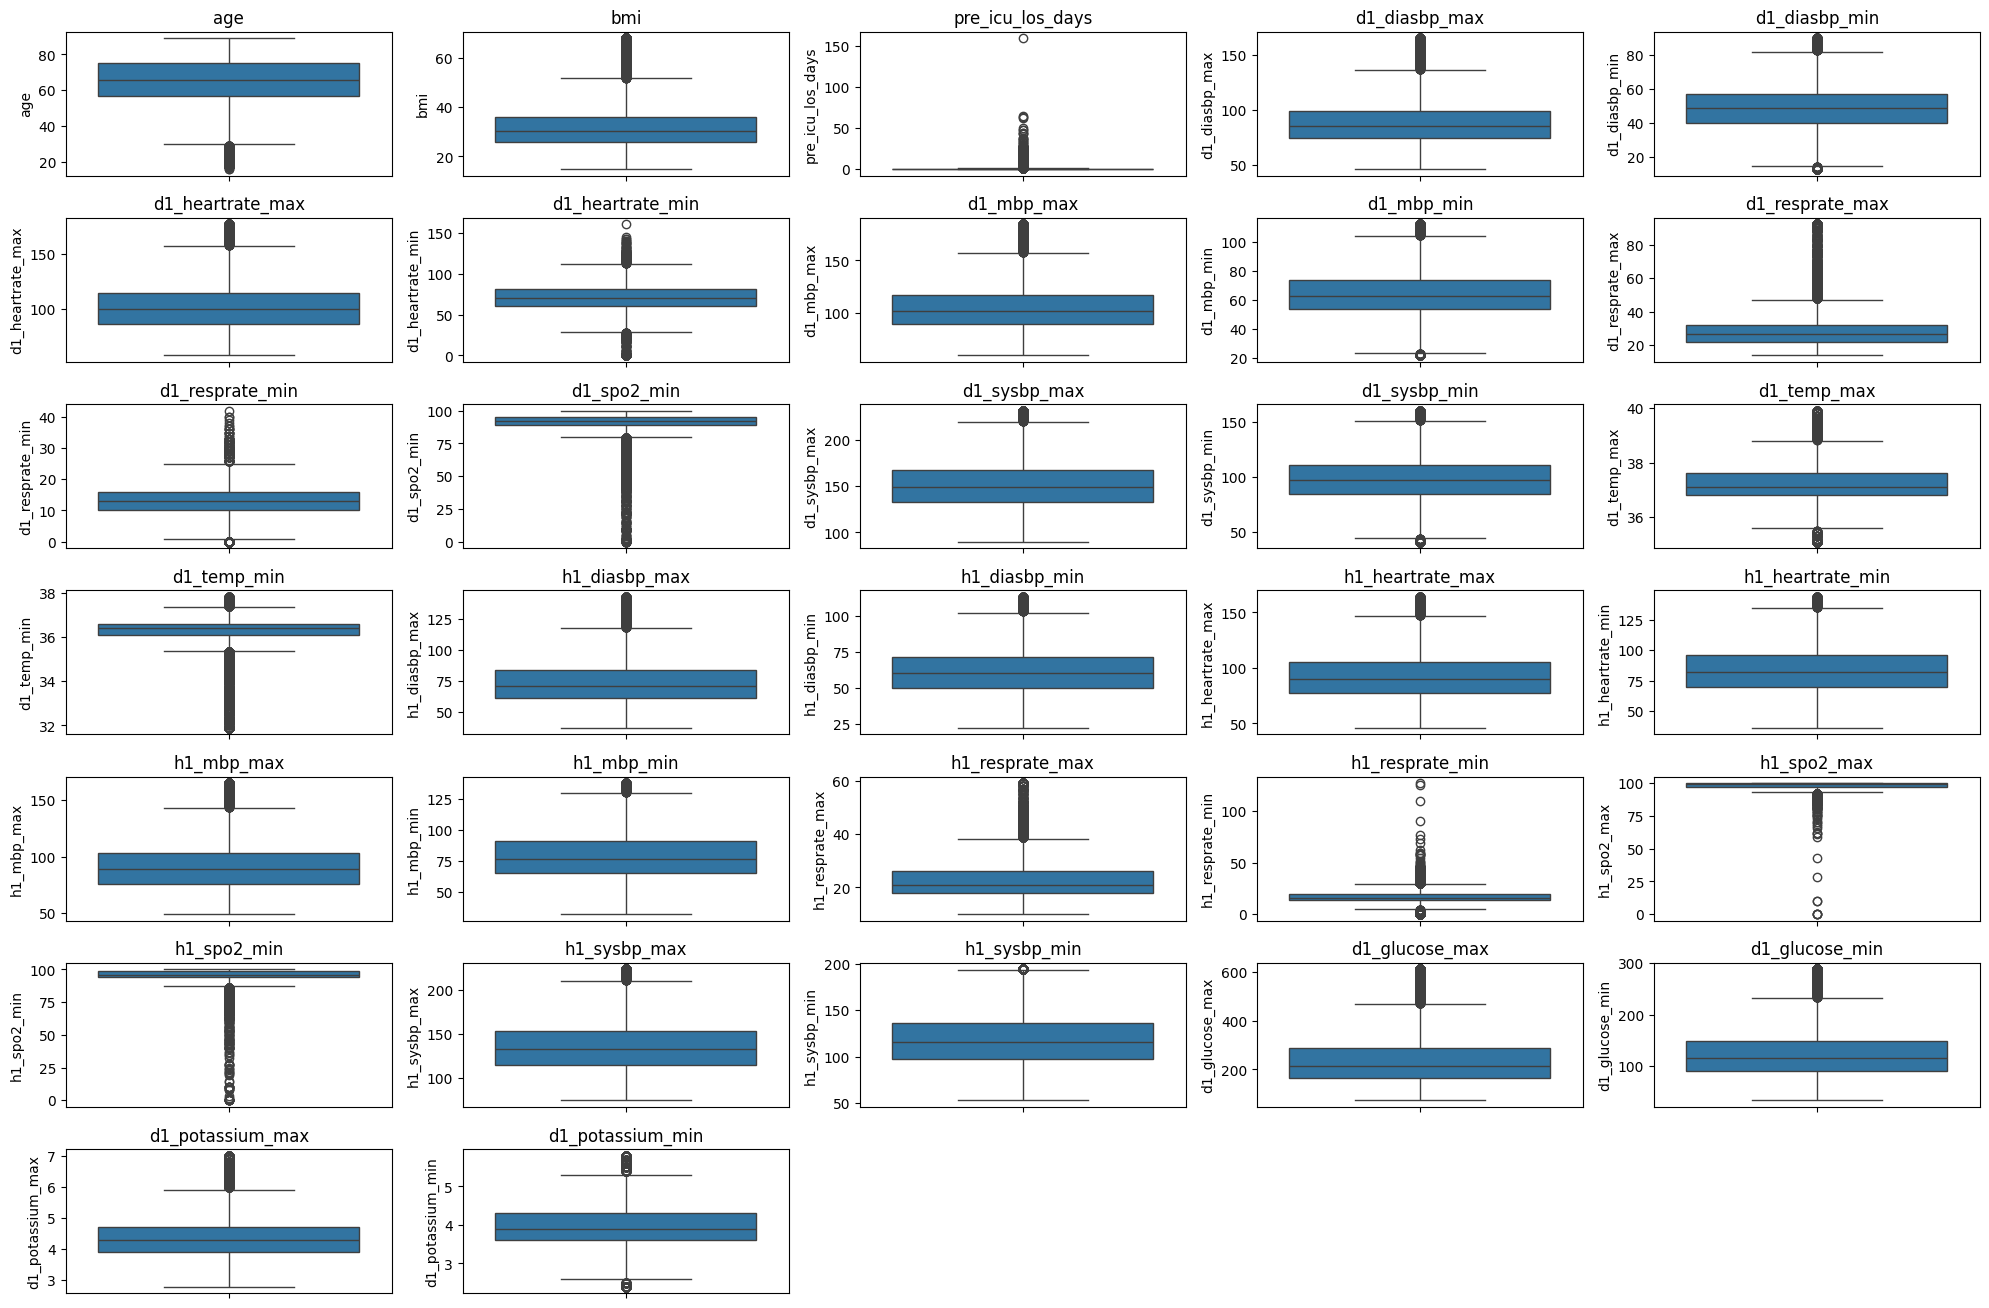

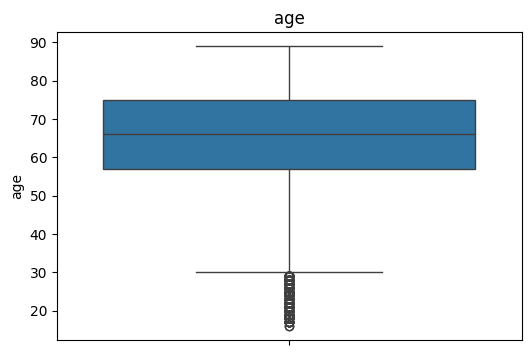

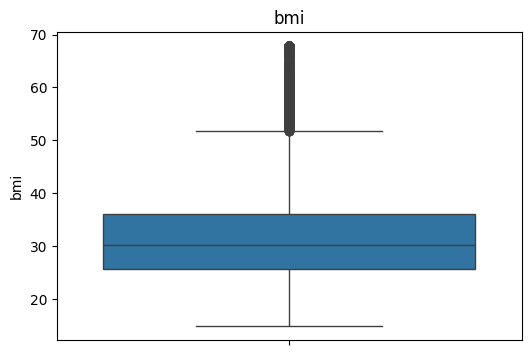

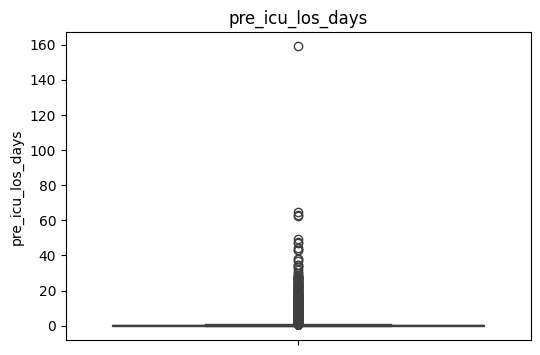

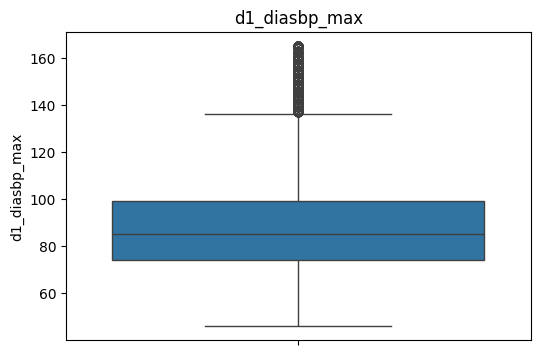

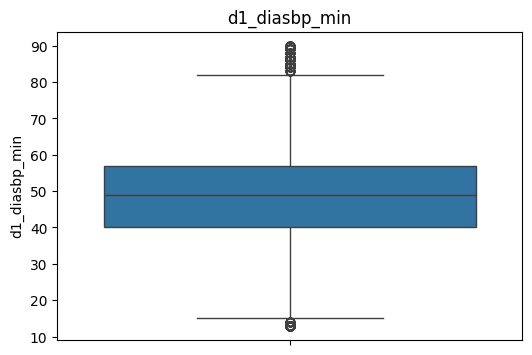

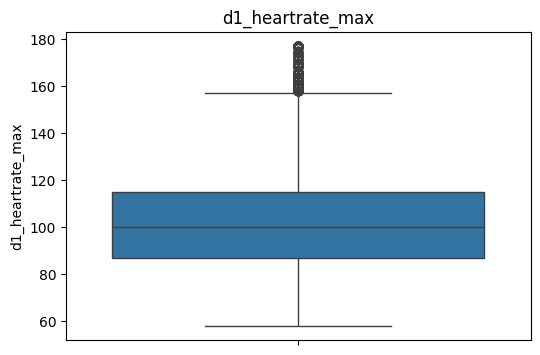

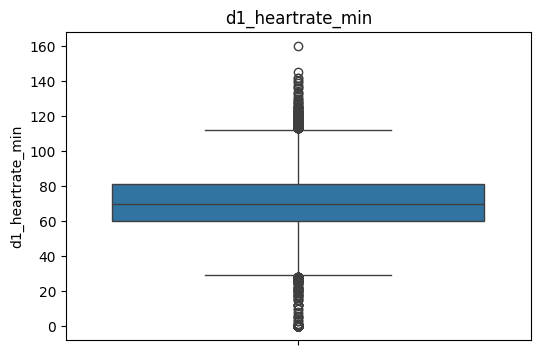

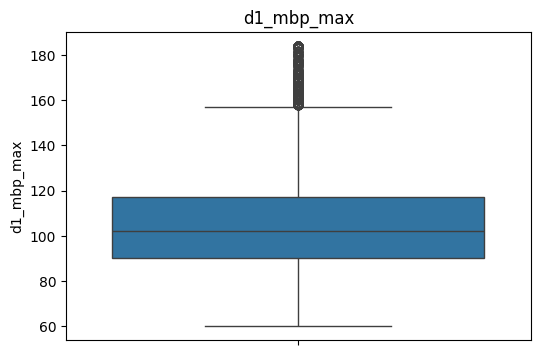

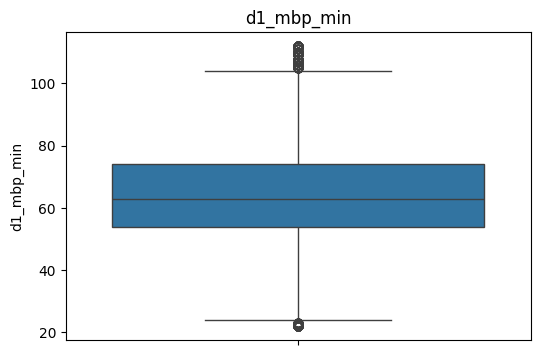

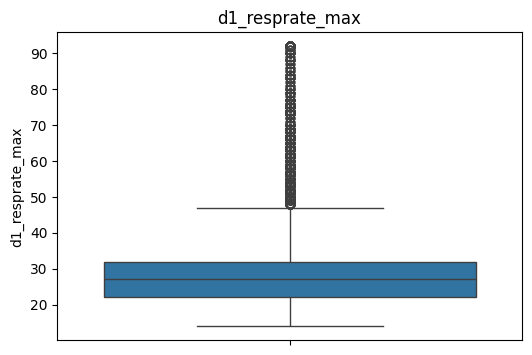

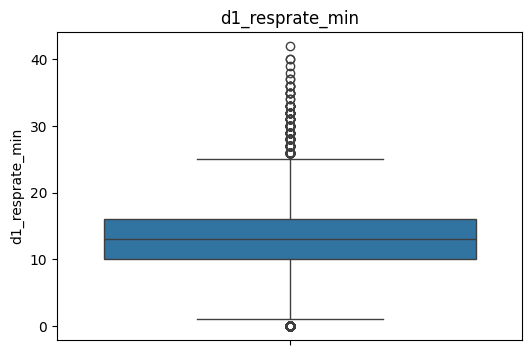

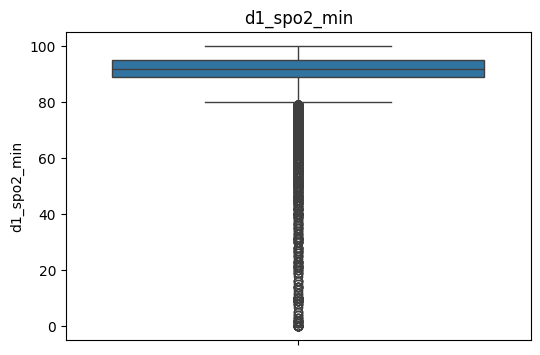

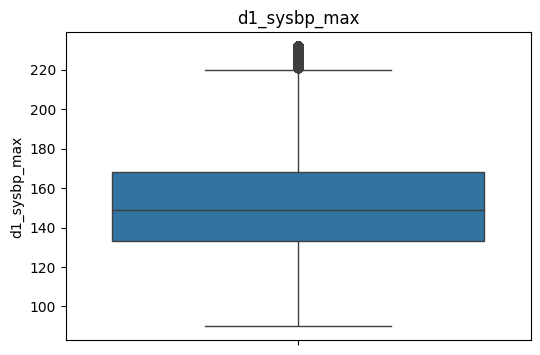

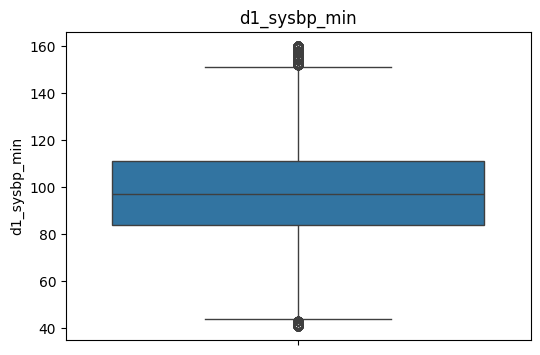

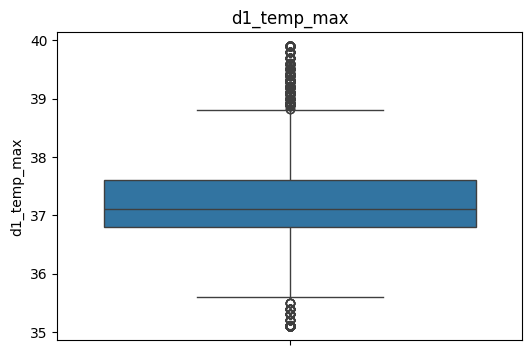

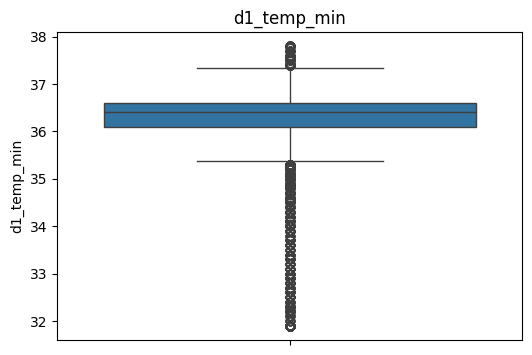

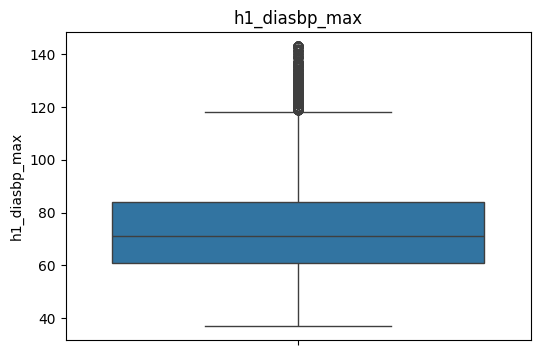

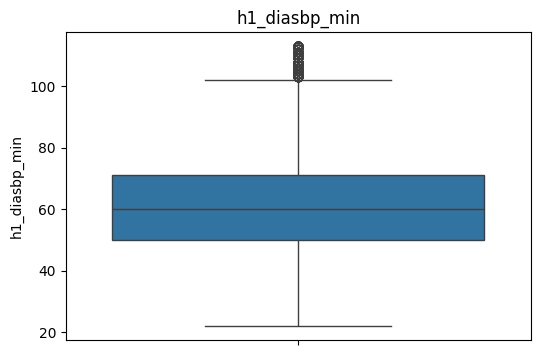

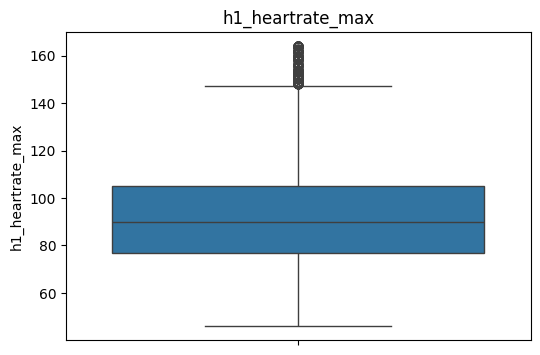

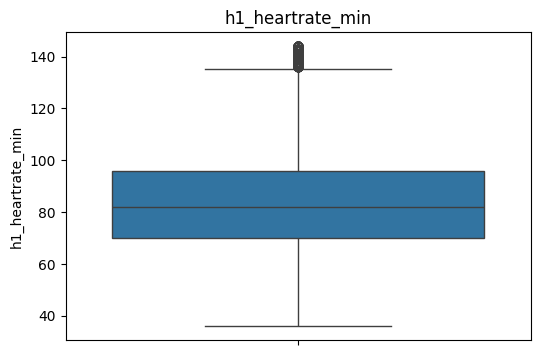

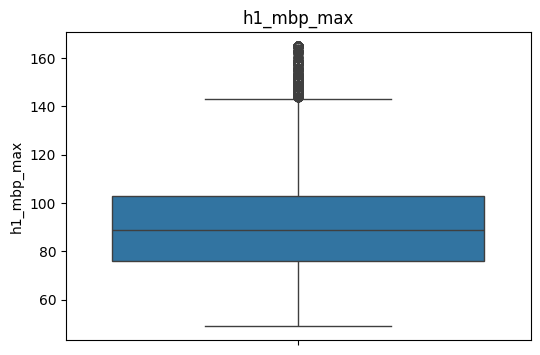

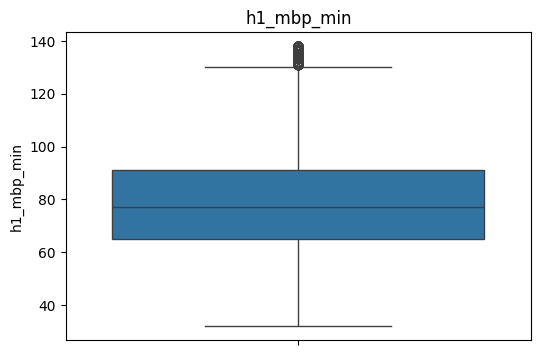

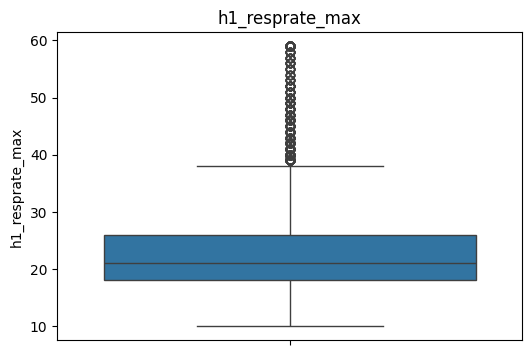

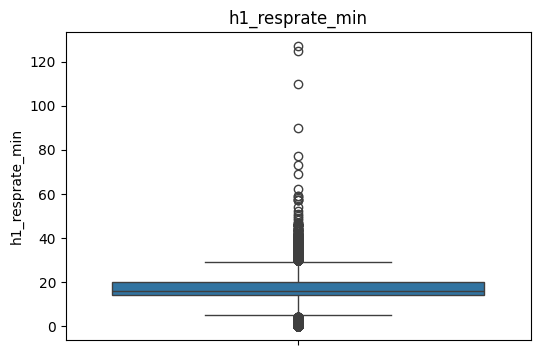

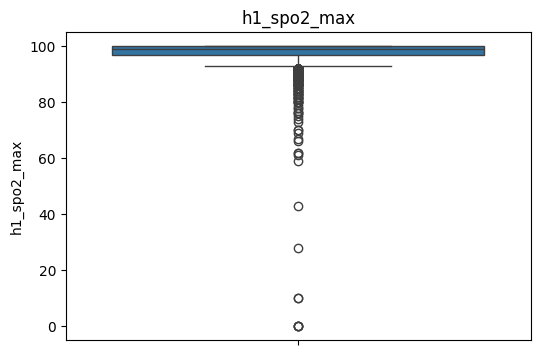

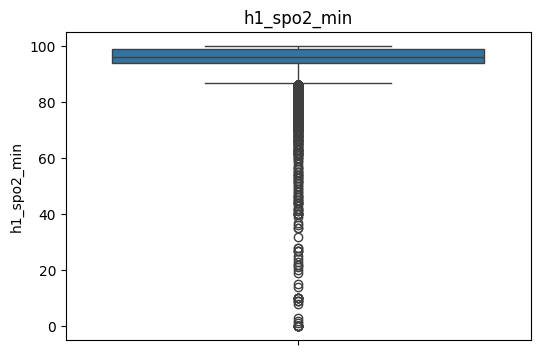

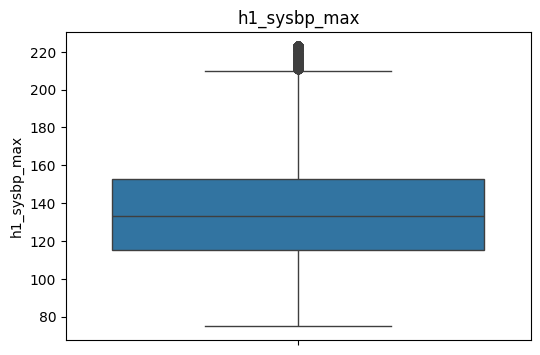

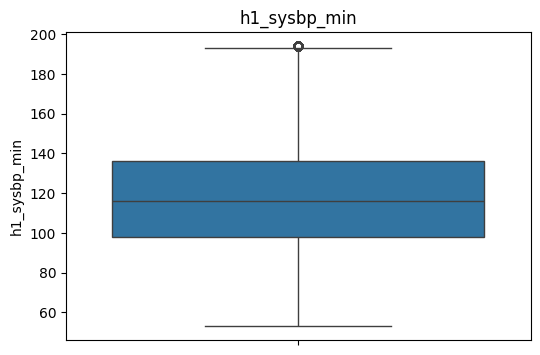

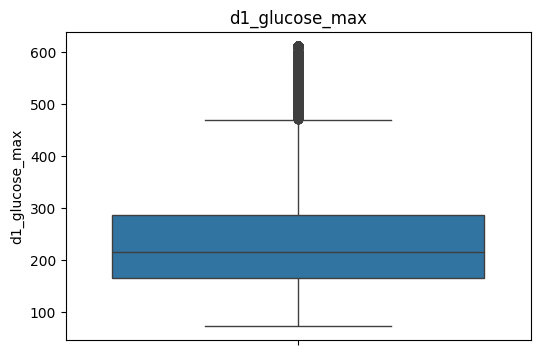

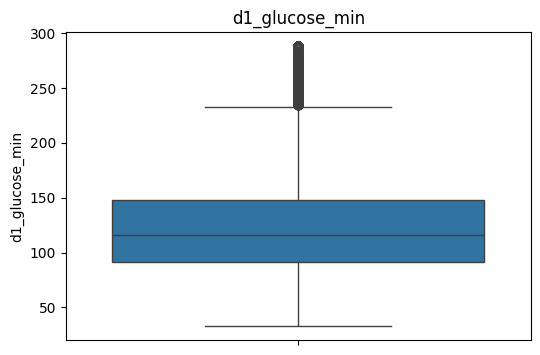

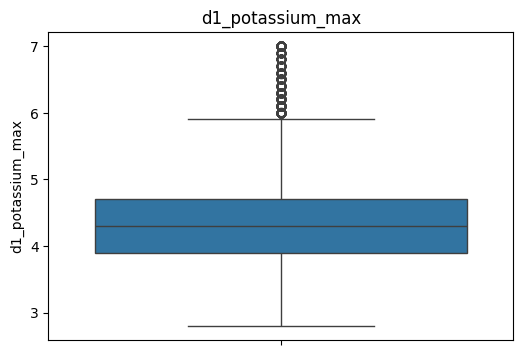

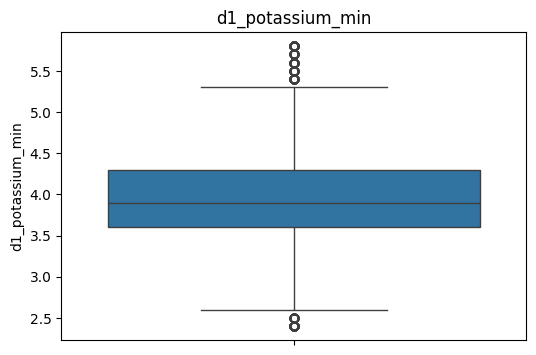

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Xdroped_3 is already defined as in your provided code

# Boxplots for all columns in Xdroped_3
plt.figure(figsize=(20, 15))  # Adjust figure size as needed
for i, col in enumerate(Xdroped_3.columns):
    plt.subplot(8, 5, i + 1)  # Adjust subplot grid as needed
    sns.boxplot(y=Xdroped_3[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

# Alternatively, you can create separate box plots for each column to make them easier to view:
for col in Xdroped_3.columns:
  plt.figure(figsize=(6, 4))
  sns.boxplot(y=Xdroped_3[col])
  plt.title(col)
  plt.show()


In [37]:
merged_df = pd.concat([Xdroped_3, y], axis=1)

In [42]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,20492.0,64.710286,14.199447,16.000000,57.000000,66.000000,75.000000,89.000000
bmi,19739.0,31.833360,8.994962,14.844926,25.708163,30.245049,36.124123,67.814990
pre_icu_los_days,20492.0,0.941478,2.802880,-0.211806,0.041667,0.152083,0.468750,159.090972
d1_diasbp_max,20468.0,87.814589,20.315277,46.000000,74.000000,85.000000,99.000000,165.000000
d1_diasbp_min,20468.0,48.843414,12.981865,13.000000,40.000000,49.000000,57.000000,90.000000
d1_heartrate_max,20471.0,102.102975,21.267001,58.000000,87.000000,100.000000,115.000000,177.000000
d1_heartrate_min,20471.0,70.916858,16.757619,0.000000,60.000000,70.000000,81.000000,160.000000
d1_mbp_max,20465.0,105.366870,21.445181,60.000000,90.000000,102.000000,117.000000,184.000000
d1_mbp_min,20465.0,64.278036,15.723225,22.000000,54.000000,63.000000,74.000000,112.000000
d1_resprate_max,20407.0,29.005341,10.744884,14.000000,22.000000,27.000000,32.000000,92.000000


In [43]:
merged_df.isnull().sum()

,0
age,0
bmi,753
pre_icu_los_days,0
d1_diasbp_max,24
d1_diasbp_min,24
d1_heartrate_max,21
d1_heartrate_min,21
d1_mbp_max,27
d1_mbp_min,27
d1_resprate_max,85


### Null handling

In [50]:
def fill_with_mean(df, features):
  """Fills NaN values in specified features with their respective means.

  Args:
    df: The pandas DataFrame.
    features: A list of feature names to process.

  Returns:
    The DataFrame with NaN values filled.
  """
  for feature in features:
    if feature in df.columns:
      mean_value = df[feature].mean()
      df[feature] = df[feature].fillna(mean_value)
  return df

# Example usage:
merged_df = fill_with_mean(merged_df, ['age', 'bmi'])

In [46]:
def fill_null_by_group(df, feature, group_column='hospital_death'):
    """
    Fills null values in a specified feature based on the mean of the feature for each group defined by the group_column.

    Args:
        df: The input DataFrame.
        feature: The name of the feature column to fill null values.
        group_column: The name of the column to group by (default: 'hospital_death').
    Returns:
        DataFrame with nulls filled
    """

    # Calculate the mean of the feature for each group
    feature_mean_death = df[df[group_column] == 1][feature].mean()
    feature_mean_alive = df[df[group_column] == 0][feature].mean()

    # Fill null values in the feature based on the group
    df.loc[df[group_column] == 1, feature] = df.loc[df[group_column] == 1, feature].fillna(feature_mean_death)
    df.loc[df[group_column] == 0, feature] = df.loc[df[group_column] == 0, feature].fillna(feature_mean_alive)
    return df

In [52]:
h1_cols = [col for col in merged_df.columns if col.startswith('h1_')]
d1_cols = [col for col in merged_df.columns if col.startswith('d1_')]

for col in h1_cols + d1_cols:
    merged_df = fill_null_by_group(merged_df, col)

In [53]:
merged_df.isnull().sum()

,0
age,0
bmi,0
pre_icu_los_days,0
d1_diasbp_max,0
d1_diasbp_min,0
d1_heartrate_max,0
d1_heartrate_min,0
d1_mbp_max,0
d1_mbp_min,0
d1_resprate_max,0


In [55]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20492 entries, 0 to 91710
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               20492 non-null  float64
 1   bmi               20492 non-null  float64
 2   pre_icu_los_days  20492 non-null  float64
 3   d1_diasbp_max     20492 non-null  float64
 4   d1_diasbp_min     20492 non-null  float64
 5   d1_heartrate_max  20492 non-null  float64
 6   d1_heartrate_min  20492 non-null  float64
 7   d1_mbp_max        20492 non-null  float64
 8   d1_mbp_min        20492 non-null  float64
 9   d1_resprate_max   20492 non-null  float64
 10  d1_resprate_min   20492 non-null  float64
 11  d1_spo2_min       20492 non-null  float64
 12  d1_sysbp_max      20492 non-null  float64
 13  d1_sysbp_min      20492 non-null  float64
 14  d1_temp_max       20492 non-null  float64
 15  d1_temp_min       20492 non-null  float64
 16  h1_diasbp_max     20492 non-null  float64
 17

In [56]:
merged_df.to_excel('merged_data.xlsx', index=False)  # Set index=False to avoid saving the index

# Download the file to your local machine (Google Colab)
from google.colab import files
files.download('merged_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>